In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing

In [ ]:
features = pd.read_excel('features_1.xlsx')
features = features.drop(columns=['Unnamed: 0'])
conditions = [
    (features['Label'] == 0),
    (features['Label'] == 1),
    (features['Label'] == 2),
    (features['Label'] == 3),
    (features['Label'] == 4),
    (features['Label'] == 5)]
choices = ['Quebra', 'Inclusão', 'Manchas', 'Corrosão Superficial por Pite', 'Carepa Incrustada', 'Marcas Superficiais']
features['defeitos'] = np.select(conditions, choices)


In [ ]:
X = features.iloc[:,0:5]
#X = X.T
#X = preprocessing.scale(X)
#X = X.T
Y = features.iloc[:,-1]
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 2)
AdaBoost = AdaBoostClassifier(n_estimators = 17, learning_rate=0.01)
AdaBoost =  AdaBoost.fit(X_treino, Y_treino)
testt = AdaBoost.predict(X_teste)
scoree = accuracy_score(Y_teste, testt)
print("AdaBoost testing accuracy=",scoree*100)

AdaBoost testing accuracy= 51.11111111111111


In [ ]:
accuracy_score(Y_treino,AdaBoost.predict(X_treino))

0.49722222222222223

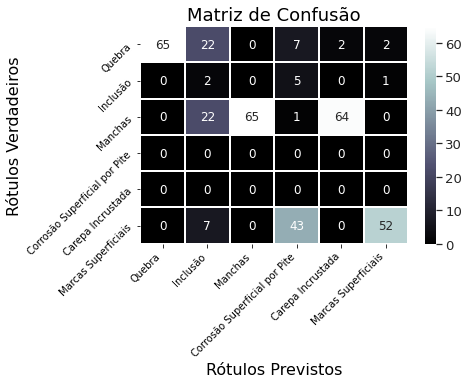

In [ ]:
import matplotlib.pyplot as plt

pred = AdaBoost.predict(X_teste)

c_matrix = confusion_matrix(pred, Y_teste)

ax = plt.subplot()
sns.set(style="ticks", color_codes=True, rc={"figure.figsize": (12, 8)}, font_scale=1.2)
sns.heatmap(c_matrix, annot=True, ax = ax, annot_kws={"size": 12}, linewidths=1, cmap = "bone");
ax.set_xlabel('Rótulos Previstos', size = '16'); ax.set_ylabel('Rótulos Verdadeiros', size = '16');
ax.set_title('Matriz de Confusão', size = '18')
ax.xaxis.set_ticklabels(choices, rotation = 45, ha = 'right'); ax.yaxis.set_ticklabels(choices, rotation = 45);

In [ ]:
print(metrics.classification_report(Y_teste, testt))

                               precision    recall  f1-score   support

            Carepa Incrustada       0.68      0.95      0.79        56
Corrosão Superficial por Pite       0.68      0.28      0.40        53
                     Inclusão       0.00      0.00      0.00        54
                      Manchas       0.47      0.77      0.59        57
          Marcas Superficiais       0.51      0.96      0.67        75
                       Quebra       0.69      0.28      0.40        65

                     accuracy                           0.56       360
                    macro avg       0.51      0.54      0.47       360
                 weighted avg       0.51      0.56      0.49       360



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
importances = pd.DataFrame({'Característica':X_treino.columns, 'Importância': np.round(AdaBoost.feature_importances_, 3)})

In [ ]:
importances

,Característica,Importância
0,contrast,0.118
1,dissimilarity,0.412
2,homogeneity,0.471
3,ASM,0.000
4,energy,0.000


findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.


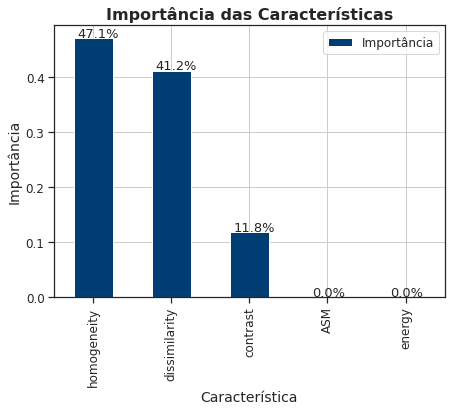

In [ ]:
importances2= importances.sort_values('Importância', ascending = False)

ax = importances2.plot(kind='bar', grid=True, figsize=(7,5), color = '#003d72')
ax.set_axisbelow(True)
plt.title("Importância das Características", fontweight='bold', fontname ='Segoe UI')

# plt.rc('font', size=20)                # controls default text sizes
plt.rc('axes', titlesize=16)             # fontsize of the axes title
plt.rc('axes', labelsize=14)             # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)            # fontsize of the tick (eixo) labels
plt.rc('ytick', labelsize=12)            # fontsize of the tick (eixo) labels
plt.rc('legend', fontsize=12)            # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#rot_y=[]
x = np.linspace(-0.2, 3.8, 5, endpoint=True)
for i in range(len(importances2)):
    rot = round(np.array(importances2)[i,1]*100 ,2)
    plt.text(x[i],np.array(importances2)[i,1]+0.002,str(rot)+"%", size = 13, fontname ='Arial')
    #rot_y.append(rot2)
    #print(rot_y)
    
#ax.set_yticklabels(str(rot2))
ax.set_xlabel('Característica', fontname ='Segoe UI')
ax.set_ylabel('Importância', fontname ='Segoe UI')
#ax.set_xticks(positions)

#ax.set_xticks(rot)
ax.set_xticklabels(importances2['Característica'], fontname ='Segoe UI')
#ax.set_yticklabels = (rot_y)
#print (ax.set_xticklabels)

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [20, 50, 100, 250, 500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 1, 2],
}
grid_AB = GridSearchCV(estimator = AdaBoostClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 4, 
                        verbose = 1,
                        n_jobs = -1)
grid_AB.fit(X_treino, Y_treino)
grid_AB.best_estimator_
testt2=grid_AB.predict(X_teste)
scoree2=accuracy_score(Y_teste, testt2)
print("Ada Boosting testing accuracy=",scoree2*100)

In [ ]:
grid_AB.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=20)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [5, 10, 20, 50, 100, 300, 700],
    'learning_rate': [0.01, 0.001, 0.05, 0.1, 0.3, 0.5],
}
grid_AB = GridSearchCV(estimator = AdaBoostClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 4, 
                        verbose = 1,
                        n_jobs = -1)
grid_AB.fit(X_treino, Y_treino)
grid_AB.best_estimator_
testt2=grid_AB.predict(X_teste)
scoree2=accuracy_score(Y_teste, testt2)
print("Ada Boosting testing accuracy=",scoree2*100)

Fitting 4 folds for each of 42 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed: 18.3min finished


Ada Boosting testing accuracy= 50.55555555555556


In [ ]:
grid_AB.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=20)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 40, 45, 50, 60, 70, 80, 90, 100, 150, 200, 300],
    'learning_rate': [1, 0.1, 0.01, 0.02, 0.03, 0.04, 0.005],
}
grid_AB = GridSearchCV(estimator = AdaBoostClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 4, 
                        verbose = 1,
                        n_jobs = -1)
grid_AB.fit(X_treino, Y_treino)
grid_AB.best_estimator_
testt2=grid_AB.predict(X_teste)
scoree2=accuracy_score(Y_teste, testt2)
print("Ada Boosting testing accuracy=",scoree2*100)
grid_AB.best_estimator_

Fitting 4 folds for each of 161 candidates, totalling 644 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min


Ada Boosting testing accuracy= 50.55555555555556


[Parallel(n_jobs=-1)]: Done 644 out of 644 | elapsed:  2.4min finished


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=17, random_state=None)